In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Made up data!!

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

n = 500

# This process would be better suited as a loop
# Making up numeric features for class 0
x1 = np.random.normal(0, 2, n)
x2 = np.random.normal(5, 2, n)
class_0 = pd.DataFrame({"x1": x1, "x2": x2})
class_0["label"] = 0

# Making up numeric features for class 1
x1 = np.random.normal(5, 2, n)
x2 = np.random.normal(0, 2, n)
class_1 = pd.DataFrame({"x1": x1, "x2": x2})
class_1["label"] = 1

# Making up numeric features for class 2
x1 = np.random.normal(5, 2, n)
x2 = np.random.normal(5, 2, n)
class_2 = pd.DataFrame({"x1": x1, "x2": x2})
class_2["label"] = 2

# Making up numeric features for class 3
x1 = np.random.normal(0, 2, n)
x2 = np.random.normal(0, 2, n)
class_3 = pd.DataFrame({"x1": x1, "x2": x2})
class_3["label"] = 3

df = pd.concat((class_1, class_2, class_3))
df.head()

,x1,x2,label
0,7.798711,1.556722,1
1,6.849267,-1.102371,1
2,5.119261,-1.636398,1
3,3.706126,-0.006749,1
4,6.396447,-0.340369,1


<IPython.core.display.Javascript object>

In [46]:
N_CLASSES = df["label"].nunique()
N_CLASSES

3

<IPython.core.display.Javascript object>

In [3]:
df["label"].value_counts()

3    500
2    500
1    500
Name: label, dtype: int64

<IPython.core.display.Javascript object>

* Create a new column that holds a string version of the label

In [8]:
df["str_label"] = "class_" + df["label"].astype(str)
df.head()

,x1,x2,label,str_label
0,7.798711,1.556722,1,class_1
1,6.849267,-1.102371,1,class_1
2,5.119261,-1.636398,1,class_1
3,3.706126,-0.006749,1,class_1
4,6.396447,-0.340369,1,class_1


<IPython.core.display.Javascript object>

* Create a pairplot/scatter matrix of the features colored by the label

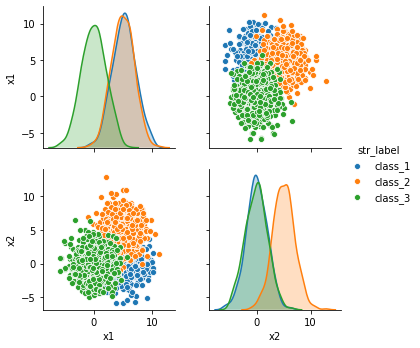

<IPython.core.display.Javascript object>

In [9]:
sns.pairplot(df[["x1", "x2", "str_label"]], hue="str_label")
plt.show()

* Separate the data into `X` and `y` and perform a train test split

In [11]:
X = df.drop(columns=["str_label", "label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

* Fit a logistic regression model to the data

In [39]:
model = LogisticRegression(multi_class="multinomial")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

* Report the accuracy.  Are we overfitting? underfitting?

In [40]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.8641666666666666
test_score: 0.8633333333333333


<IPython.core.display.Javascript object>

* Use the `plot_decision_regions` function to... plot the decision regions

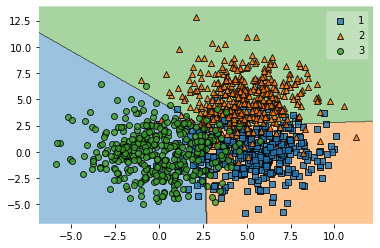

<IPython.core.display.Javascript object>

In [41]:
plot_decision_regions(X_train.values, y_train.values, model)
plt.show()

* Generate a confusion matrix for the model on the test set

In [42]:
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

In [47]:
con_mat = confusion_matrix(y_test, y_pred)

pd.DataFrame(
    con_mat,
    index=[f"actual_{i}" for i in range(1, N_CLASSES + 1)],
    columns=[f"pred_{i}" for i in range(1, N_CLASSES + 1)],
)

,pred_1,pred_2,pred_3
actual_1,82,10,12
actual_2,7,79,0
actual_3,10,2,98


<IPython.core.display.Javascript object>

* Predict the probability of each observation belonging to each class
* Put this data in a dataframe

In [73]:
probs = model.predict_proba(X_test)
probs_df = pd.DataFrame(probs, columns=[f"prob_{i}" for i in range(1, N_CLASSES + 1)])

# Manually predict
probs_df["predicted_prob"] = np.argmax(probs_df.values, axis=1) + 1
probs_df["predicted"] = model.predict(X_test)

# Put in labels
probs_df["actual"] = y_test.reset_index(drop=True)

probs_df["wrong"] = probs_df["actual"] != probs_df["predicted"]
probs_df["pred_class_prob"] = probs_df[["prob_1", "prob_2", "prob_3"]].max(axis=1)

probs_df["confident"] = probs_df["pred_class_prob"] > 0.6
probs_df["wrong_and_conf"] = probs_df["confident"] & probs_df["wrong"]
probs_df

,prob_1,prob_2,prob_3,predicted_prob,predicted,actual,wrong,pred_class_prob,confident,wrong_and_conf
0,0.017652,0.000092,0.982257,3,3,3,False,0.982257,True,False
1,0.080579,0.006813,0.912608,3,3,3,False,0.912608,True,False
2,0.889161,0.002544,0.108295,1,1,1,False,0.889161,True,False
3,0.902721,0.097142,0.000136,1,1,1,False,0.902721,True,False
4,0.550795,0.448929,0.000276,1,1,1,False,0.550795,False,False
...,...,...,...,...,...,...,...,...,...,...
295,0.016149,0.978705,0.005146,2,2,2,False,0.978705,True,False
296,0.013585,0.956393,0.030022,2,2,2,False,0.956393,True,False
297,0.802760,0.038752,0.158488,1,1,3,True,0.802760,True,True
298,0.213704,0.033469,0.752827,3,3,3,False,0.752827,True,False


<IPython.core.display.Javascript object>

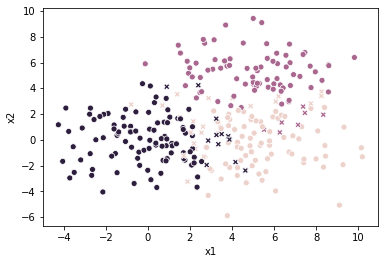

<IPython.core.display.Javascript object>

In [84]:
# can we try plotting the confident misses as red X's
# on the decision regions plot we had above
ax = sns.scatterplot(
    X_test["x1"].reset_index(drop=True),
    X_test["x2"].reset_index(drop=True),
    hue=y_test.reset_index(drop=True),
    style=probs_df["wrong"].reset_index(drop=True),
)
ax.get_legend().remove()
plt.show()

* Generate a ROC Curve for each class

NameError: name 'label_df' is not defined

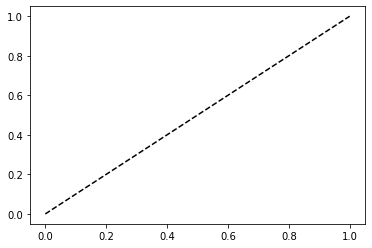

<IPython.core.display.Javascript object>

In [6]:
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
for i in range(0, 4):
    true = label_df[f"true_{i}"]
    prob = label_df[f"prob_{i}"]

    auc = roc_auc_score(true, prob)
    fprs, tprs, thresholds = roc_curve(true, prob)
    plt.plot(fprs, tprs, label=f"Class {i} (AUC: {auc:.3f})")

plt.legend()
plt.show()